In [87]:
import warnings
warnings.filterwarnings('ignore')

### Student task
Check if applying polynomial features and RFC can inprove quality of solution for 
regression for datasets.load_diabetes()

# Preparing data

In [88]:
from sklearn import datasets

diabetes_data, diabetes_target = datasets.load_diabetes(return_X_y=True)

print(diabetes_data.shape)
print(diabetes_target.shape)
print(diabetes_data[1])

(442, 10)
(442,)
[-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
  0.07441156 -0.03949338 -0.06832974 -0.09220405]


In [89]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

diabetes_data = standard_scaler.fit_transform(diabetes_data)

print(diabetes_data[1])

[-0.03956713 -0.93853666 -1.08218016 -0.55351103 -0.17762425 -0.40288615
  1.56441355 -0.83030083 -1.43655059 -1.93847913]


In [90]:
from sklearn.model_selection import train_test_split

diabetes_train_data, diabetes_test_data, diabetes_train_target, diabetes_test_target = \
train_test_split(diabetes_data, diabetes_target, test_size=0.1, random_state=1010)

In [91]:
print(diabetes_train_data.shape)
print(diabetes_test_data.shape)

(397, 10)
(45, 10)


### Using LinearRegression as a benchmark

In [92]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(diabetes_train_data, diabetes_train_target)

LinearRegression()

In [93]:
from sklearn.metrics import mean_squared_error

print("Mean squared error of a linear moderl: %.2f" % 
      mean_squared_error(diabetes_test_target, linear_regression.predict(diabetes_test_data)))
print("Linear Regression variance score: %.2f" % 
    linear_regression.score(diabetes_test_data, diabetes_test_target))

Mean squared error of a linear moderl: 2511.20
Linear Regression variance score: 0.56


## Generating polynomial features

In [94]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(2, )

diabetes_train_poly_data = poly_feat.fit_transform(diabetes_train_data)
print(diabetes_train_poly_data.shape)

diabetes_test_poly_data = poly_feat.fit_transform(diabetes_test_data)
print(diabetes_test_poly_data.shape)

(397, 66)
(45, 66)


### Training

In [95]:
poly_linear_regression = LinearRegression()
poly_linear_regression.fit(diabetes_train_poly_data, diabetes_train_target)

LinearRegression()

In [96]:
print("Mean squared error of a linear model using polynomial features: %.2f" % 
      mean_squared_error(diabetes_test_target, poly_linear_regression.predict(diabetes_test_poly_data)))
print("Linear Regression variance score using polynomial features: %.2f" % 
      poly_linear_regression.score(diabetes_test_poly_data, diabetes_test_target))

Mean squared error of a linear model using polynomial features: 4616.45
Linear Regression variance score using polynomial features: 0.19


In [97]:
degrees = [1,2,3,4,5,6]

array_mean_squared_errors = []
array_variance_scores = []

In [98]:
for degree in degrees:
    poly_feat_ex = PolynomialFeatures(degree, )
    train_data = poly_feat_ex.fit_transform(diabetes_train_data)
    test_data = poly_feat_ex.fit_transform(diabetes_test_data)
    poly_linear_regression.fit(train_data, diabetes_train_target)
    array_mean_squared_errors.append(mean_squared_error(diabetes_test_target, poly_linear_regression.predict(test_data)))
    array_variance_scores.append(poly_linear_regression.score(test_data, diabetes_test_target))

print(array_mean_squared_errors)
print(array_variance_scores)

[2511.2014048969427, 4616.454513888889, 626918.3708333333, 1445123.9613059205, 6015883.439485252, 20522343.947726067]
[0.561246731909019, 0.19342012910141904, -108.53421875800792, -251.48984792025394, -1050.0859520791355, -3584.63254161667]


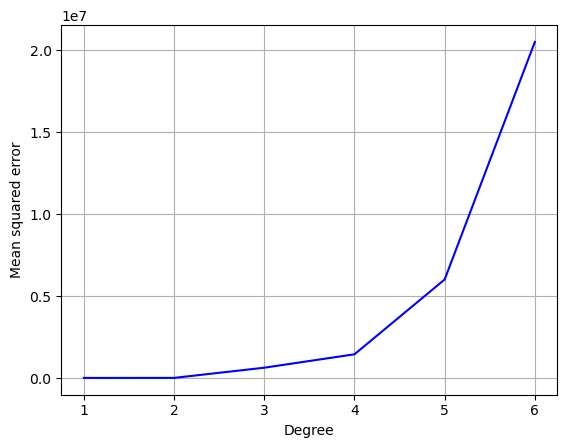

In [99]:
import numpy as np
import matplotlib.pyplot as plt

mean_x = np.array(degrees)
mean_y = np.array(array_mean_squared_errors)

plt.plot(mean_x, mean_y, color="blue")
plt.grid()
plt.xlabel("Degree")
plt.ylabel("Mean squared error")
plt.show()

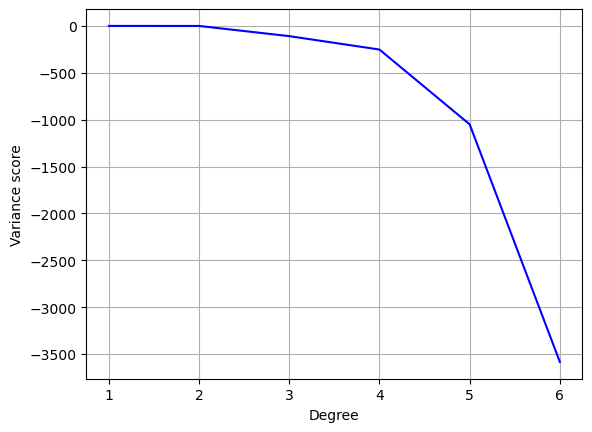

In [100]:
variance_x = np.array(degrees)
variance_y = np.array(array_variance_scores)

plt.plot(variance_x, variance_y, color="blue")
plt.xlabel("Degree")
plt.ylabel("Variance score")
plt.grid()
plt.show()

## Ranking features with RFE

In [101]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LinearRegression(), n_features_to_select=45)
rfe.fit(diabetes_train_poly_data, diabetes_train_target)

RFE(estimator=LinearRegression(), n_features_to_select=45)

In [102]:
print("Mean squared error of a linear model using polynomial features: %.2f" % 
      mean_squared_error(diabetes_test_target, rfe.predict(diabetes_test_poly_data)))
print("Linear Regression variance score using polynomial features: %.2f" % 
      rfe.score(diabetes_test_poly_data, diabetes_test_target))

Mean squared error of a linear model using polynomial features: 4109.42
Linear Regression variance score using polynomial features: 0.28


In [103]:
poly_feat_ex = PolynomialFeatures(2, )
ex_train_data = poly_feat_ex.fit_transform(diabetes_train_data)
ex_test_data = poly_feat_ex.fit_transform(diabetes_test_data)

In [104]:
feature_number = [5,10,15,20,25,30,35,40,45,50,55,60]

mean_rfe_err = []
variance_rfe_score = []

In [105]:
for feature in feature_number:
    ex_rfe = RFE(estimator=LinearRegression(normalize=False), n_features_to_select=feature)
    ex_rfe.fit(ex_train_data, diabetes_train_target)
    mean_rfe_err.append(mean_squared_error(diabetes_test_target, ex_rfe.predict(ex_test_data)))
    variance_rfe_score.append(ex_rfe.score(ex_test_data, diabetes_test_target))

print(mean_rfe_err)
print(variance_rfe_score)

[3514.3930727057664, 3427.0532713795424, 3510.651045093871, 2827.11804326151, 2710.042494618265, 3377.7540029003826, 3629.363973856159, 4142.010966494049, 4109.423862596302, 4354.9765625, 4799.290885416666, 4132.611458333334]
[0.3859706182868913, 0.40123049477133854, 0.38662441962708016, 0.5060502601101116, 0.5265055208791604, 0.40984398754716533, 0.36588307830832467, 0.2763141799482516, 0.2820077488929311, 0.23910515678653133, 0.1614752379519967, 0.2779564476357097]


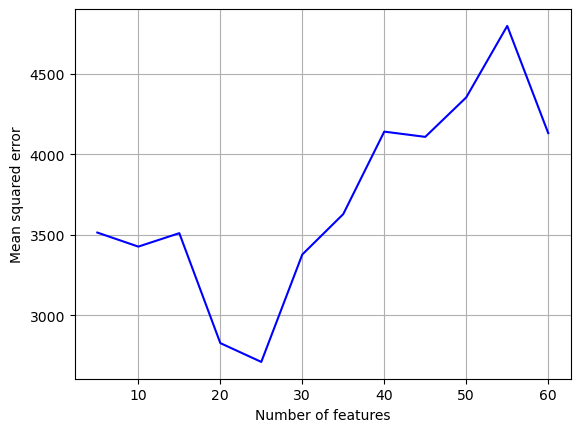

In [106]:
rfe_mean_x = np.array(feature_number)
rfe_mean_y = np.array(mean_rfe_err)

plt.plot(rfe_mean_x, rfe_mean_y, color="blue")
plt.grid()
plt.xlabel("Number of features")
plt.ylabel("Mean squared error")
plt.show()

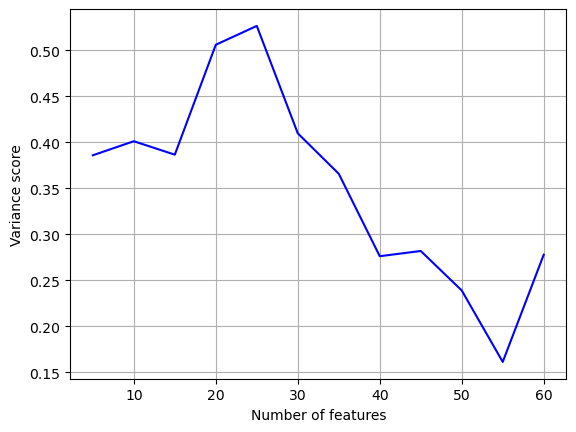

In [107]:
rfe_variance_x = np.array(feature_number)
rfe_variance_y = np.array(variance_rfe_score)

plt.plot(rfe_variance_x, rfe_variance_y, color="blue")
plt.xlabel("Number of features")
plt.ylabel("Variance score")
plt.grid()
plt.show()